In [ ]:
import torch
import numpy as np

In [ ]:
#Conversione array numpy in torch tensor
ndarray = np.array([0, 1, 2.3])
t = torch.from_numpy(ndarray)
print(t)

tensor([0.0000, 1.0000, 2.3000], dtype=torch.float64)


A tensor on PyTorch has 3 attributes:
- shape
- data type
- device

In [ ]:
print("Shape of torch tensor: {}".format(t.shape))
print("Type of torch tensor: {}".format(t.dtype))
print("Device of torch tensor: {}".format(t.device))

Shape of torch tensor: torch.Size([3])
Type of torch tensor: torch.float64
Device of torch tensor: cpu


### Implementation of a basic pytorch MLP architecture to illustrate a tipical DL pipeline implemented in pytorch.

In [ ]:
import matplotlib.pyplot as plt
from scipy.stats import norm
import torchvision

print(torch.__version__)
print(torchvision.__version__)

2.0.0+cu118
0.15.1+cu118


In [ ]:
#In torch, data and models myst be moved in the specific processing unit
#This code snippet allows to set the variable "device" according to available resource (cpu or cuda gpu)
if torch.cuda.is_available():
  print("number of devices: ", torch.cuda.device_count())
  print(torch.cuda.get_device_name(0))

#In queste due righe di codice setto la variabile device su cuda se è available (altrimenti cpu)
device = ('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Computation device: {device}\n")

number of devices:  1
Tesla T4
Computation device: cuda



In [ ]:
#Dataset: in this simple toy example, we'll produce a toy dataset generated using numpy
#Task: 2 class classification problem, with 8 uncorrelated features, gaussian distributed with different
#means and variance among features and classes

features_S = np.random.normal(loc=[-4., -3., -2., -1., 1., 2., 3., 4.], scale = np.random.uniform(0.2, 0.7, size = (8)), size = (2000, 8)) #2000 eventi ciascuno con 8 features
features_B = np.random.normal(loc=[-4.5, -3.5, -2.5, -1.5, 1.5, 2.5, 3.5, 4.5], scale = np.random.uniform(0.2, 0.7, size = (8)), size = (2000, 8)) #2000 eventi ciascuno con 8 features

labels_S = np.zeros(shape = (2000)) #label 0 for class S 
labels_B = np.ones(shape = (2000)) #label 1 for class B

#Concatenate S and B in one dataset:
X = np.concatenate((features_S, features_B), axis = 0)
Y = np.concatenate((labels_S, labels_B), axis = 0)

#Divide the dataset in train and test
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, shuffle = True, random_state = 12345)
X_train, X_vali, Y_train, Y_vali = train_test_split(X_train, Y_train, test_size = 0.2, shuffle = True, random_state = 456789)
print(f"Shape X_train: {X_train.shape}")
print(f"Shape Y_train: {Y_train.shape}")
print(f"Shape X_vali: {X_vali.shape}")
print(f"Shape Y_vali: {Y_vali.shape}")
print(f"Shape X_test: {X_test.shape}")
print(f"Shape Y_test: {Y_test.shape}")


Shape X_train: (2560, 8)
Shape Y_train: (2560,)
Shape X_vali: (640, 8)
Shape Y_vali: (640,)
Shape X_test: (800, 8)
Shape Y_test: (800,)


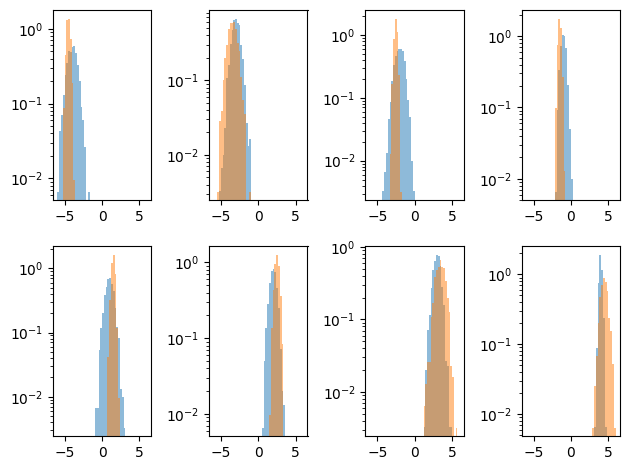

In [ ]:
#Plot variables
sel_S = tuple([Y_train < 0.5])
sel_B = tuple([Y_train > 0.5])

for idx in range(8):
  plt.subplot(2, 4, idx+1)
  plt.hist((X_train[sel_S])[:, idx], bins = 50, range = [-6., 6.], alpha = 0.5, log = True, density = True)
  plt.hist((X_train[sel_B])[:, idx], bins = 50, range = [-6., 6.], alpha = 0.5, log = True, density = True)
plt.tight_layout()

In [ ]:
#Transform the numpy arrays to torch tensors (pytorch works with torch tensors)
#In deep learning, tensors are a fundamental data structure that is very similar to arrays and matrices,
#with which we can efficiently perform mathematical operations on large sets of data. A tensor can be represented
#as a matrix, but also a vector, a scalar, or a higher-dimensional array.
#A torch tensor is a structur very similar to a numpy ndarray, with the difference that they are capable of runnung on a
#GPU, which dramatically speeds up the computational process

#Trasformo np.ndarray in torch tensors:
X_train_pt = torch.Tensor(X_train).float()
Y_train_pt = torch.Tensor(Y_train).int()
X_vali_pt = torch.Tensor(X_vali).float()
Y_vali_pt = torch.Tensor(Y_vali).int()
X_test_pt = torch.Tensor(X_test).float()
Y_test_pt = torch.Tensor(Y_test).int()

print(f"Shape X_train_pt: {X_train_pt.shape}")
print(f"Shape Y_train_pt: {Y_train_pt.shape}")
print(f"Shape X_vali_pt: {X_vali_pt.shape}")
print(f"Shape Y_vali_pt: {Y_vali_pt.shape}")
print(f"Shape X_test_pt: {X_test_pt.shape}")
print(f"Shape Y_test_pt: {Y_test_pt.shape}")


Shape X_train_pt: torch.Size([2560, 8])
Shape Y_train_pt: torch.Size([2560])
Shape X_vali_pt: torch.Size([640, 8])
Shape Y_vali_pt: torch.Size([640])
Shape X_test_pt: torch.Size([800, 8])
Shape Y_test_pt: torch.Size([800])


In [ ]:
#Now we can create a torch dataset and a pytorch dataloader

from torch.utils.data import TensorDataset, DataLoader

dataset_train = TensorDataset(X_train_pt, Y_train_pt) #a dataset is a pair of feature tensor & target tensor
dataloader_train = DataLoader(dataset_train, batch_size = 32, shuffle = True) #Dataset will be shuffled and batched in mini batch of 32 events each

dataset_vali = TensorDataset(X_vali_pt, Y_vali_pt)
dataloader_vali = DataLoader(dataset_vali, batch_size = 32, shuffle = True)

In [ ]:
#Example of iteration through dataloader
train_features, train_labels = next(iter(dataloader_train))

print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")

an_event = train_features[9].squeeze()
a_label = train_labels[9]

print(f"Feature: {an_event}")
print(f"Label: {a_label}")

Feature batch shape: torch.Size([32, 8])
Labels batch shape: torch.Size([32])
Feature: tensor([-2.2434, -3.6620, -2.4237, -0.8411,  0.9554,  2.3132,  2.4916,  3.7402])
Label: 0


In [ ]:
#note: move torch tensors between cpu and gpu
print("device: ", device)
print("X_train_pt is in GPU: ", X_train_pt.is_cuda)
X_train_pt = X_train_pt.to(device)
print("X_train_pt is in GPU: ", X_train_pt.is_cuda)
X_train_pt = X_train_pt.to('cpu')
print("X_train_pt is in GPU: ", X_train_pt.is_cuda)

device:  cuda
X_train_pt is in GPU:  False
X_train_pt is in GPU:  True
X_train_pt is in GPU:  False


In [ ]:
#A pytorch nn model: it is just a python class inheriting from nn.Module
#that defines the layers and activations used in the DNN model and a forward(x) method that
#defines how the model act on an input example x

from torch import nn
import torch.nn.functional as F

#shallow ANN with dense layer with 20 neurons
class ShallowANN(nn.Module):
  def __init__(self, input_dim):
    super(ShallowANN, self).__init__()

    self.layer1 = nn.Linear(input_dim, 20)
    self.activ1 = nn.ReLU()
    self.layer2 = nn.Linear(20, 1)
    self.activ2 = nn.Sigmoid()

  def forward(self, x):
    out = self.layer1(x)
    out = self.activ1(out)
    out = self.layer2(out)
    out = self.activ2(out)
    return out

In [ ]:
%pip install torchsummary

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#print the model architecture
#simple printing
model = ShallowANN(input_dim = 8)
print(model)

ShallowANN(
  (layer1): Linear(in_features=8, out_features=20, bias=True)
  (activ1): ReLU()
  (layer2): Linear(in_features=20, out_features=1, bias=True)
  (activ2): Sigmoid()
)


In [ ]:
#torchsummary (keras-like) printing
from torchsummary import summary
if torch.cuda.is_available():
  summary(model.cuda(), input_size = (1, 8))
else:
  summary(model, input_size = (1, 8))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                [-1, 1, 20]             180
              ReLU-2                [-1, 1, 20]               0
            Linear-3                 [-1, 1, 1]              21
           Sigmoid-4                 [-1, 1, 1]               0
Total params: 201
Trainable params: 201
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------


In [ ]:
#REINSTANTIATE A NEW MODEL (RESET WEIGHT) and PUT IT ON GPU
model = ShallowANN(input_dim = 8)
model.to(device)

print('Model is on GPU: ', next(model.parameters()).is_cuda)

Model is on GPU:  True


In [ ]:
#Install torchmetrics: collection of useful Pytorch metrics implementations and an easy-to -use API
#to create custom metrics
%pip install torchmetrics


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.2/519.2 kB 13.8 MB/s eta 0:00:00


LOSS FUNCTION

In classification task the most used tool is cross-entropy. In pytorch we have: 
- BCELoss for binary classification
- CrossEntropyLoss for multiclass classification 

In [ ]:
loss_func = nn.BCELoss() #binary cross entropy loss

#Metrics
#Binary accuracy: torchmetrics.functional.classification.binary_accuracy(preds, target)
import torchmetrics
from torchmetrics.functional.classification import binary_accuracy

metric_func = binary_accuracy

#Optimizer
from torch import optim

#plain SGD + momentum
#opt = optim.SGD(model.parameters(), lr = 0.001, momentum = 0.9)
#or for example
opt = optim.Adam(model.parameters(), lr = 1e-3)

In [ ]:
#Test implementation on one batch before to train
xb, yb = next(iter(dataloader_train))
xb = xb.type(torch.float).to(device) #put tensors on device
yb = yb.type(torch.float).to(device)

#prediction
pred = model(xb)
print('output shape ', pred.shape)

#Loss and metric 
loss = loss_func(pred, torch.unsqueeze(yb, 1))
metric = binary_accuracy(pred, torch.unsqueeze(yb, 1))

print('Loss: ', loss.item())
print('Metric: ', metric.item())

output shape  torch.Size([32, 1])
Loss:  0.7710956335067749
Metric:  0.59375


In [ ]:
#TRAINING LOOP
import time
epochs = 100

#Define a couple of lists to store loss and accuracy during training for monitorin purposes
hist_loss = []
hist_metric = []
hist_val_loss = []
hist_val_metric = []

#Loop
for epoch in range(epochs):
  t0 = time.time()
  
  #Training step
  model.train() #Important!!

  train_loss = 0.0
  train_metric = 0.0
  counter = 0

  for xb, yb in dataloader_train: #loop over minibatches
    counter += 1
    #move data and target to device
    xb = xb.type(torch.float).to(device)
    yb = yb.type(torch.float).to(device)

    #get model prediction
    pred = model(xb)

    #compute loss
    loss = loss_func(pred, torch.unsqueeze(yb, 1))
    
    #Compute metric
    metric = metric_func(pred, torch.unsqueeze(yb, 1))
    
    train_loss += loss.item()
    train_metric += metric.item()

    #Backpropagation
    loss.backward()
    opt.step()
    opt.zero_grad()

  train_loss = train_loss/counter
  train_metric = train_metric/counter

  hist_loss.append(train_loss)
  hist_metric.append(train_metric)

  #Validation step
  model.eval() #Important!

  vali_loss = 0.0
  vali_metric = 0.0
  counter = 0

  with torch.no_grad():
    for xb, yb in dataloader_vali:
      counter += 1
      xb = xb.type(torch.float).to(device)
      yb = yb.type(torch.float).to(device)
      pred = model(xb)
      vloss = loss_func(pred, torch.unsqueeze(yb, 1))
      vmetric = metric_func(pred, torch.unsqueeze(yb, 1))
      vali_loss += vloss.item()
      vali_metric += vmetric.item()

  vali_loss = vali_loss/counter
  vali_metric = vali_metric/counter

  hist_val_loss.append(vali_loss)
  hist_val_metric.append(vali_metric)

  elapsed_time = time.time()-t0
  print("Epoch: %d, time(s): %.4f, train loss: %.6f, train metric: %.6f, vali loss: %.6f, vali metric: %.6f" % (epoch+1, elapsed_time, train_loss, train_metric, vali_loss, vali_metric))

Epoch: 1, time(s): 0.2401, train loss: 0.713389, train metric: 0.503125, vali loss: 0.686852, vali metric: 0.525000
Epoch: 2, time(s): 0.1996, train loss: 0.674570, train metric: 0.566406, vali loss: 0.665327, vali metric: 0.618750
Epoch: 3, time(s): 0.2039, train loss: 0.652249, train metric: 0.644531, vali loss: 0.640919, vali metric: 0.676562
Epoch: 4, time(s): 0.2151, train loss: 0.626332, train metric: 0.693359, vali loss: 0.613921, vali metric: 0.745313
Epoch: 5, time(s): 0.2007, train loss: 0.598693, train metric: 0.749609, vali loss: 0.583525, vali metric: 0.768750
Epoch: 6, time(s): 0.2210, train loss: 0.567698, train metric: 0.788281, vali loss: 0.554489, vali metric: 0.773438
Epoch: 7, time(s): 0.1962, train loss: 0.536345, train metric: 0.803906, vali loss: 0.523493, vali metric: 0.789062
Epoch: 8, time(s): 0.2130, train loss: 0.506092, train metric: 0.810547, vali loss: 0.492707, vali metric: 0.832812
Epoch: 9, time(s): 0.1974, train loss: 0.479185, train metric: 0.832031,

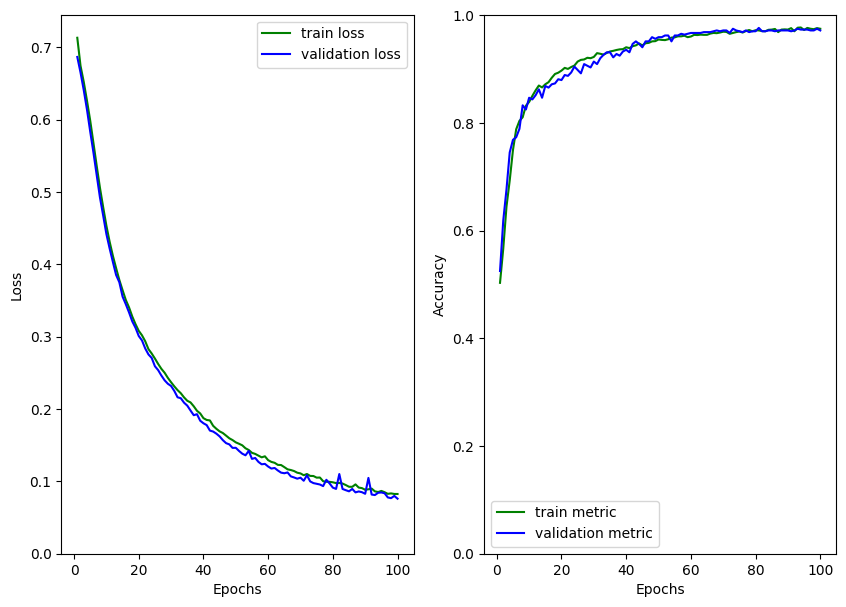

In [ ]:
#Plot training results
plt.figure(figsize = (10, 7))
plt.subplot(1,2,1)
plt.plot(range(1, len(hist_loss)+1), hist_loss, linestyle = '-', label = 'train loss', color ='g',)
plt.plot(range(1, len(hist_val_loss)+1), hist_val_loss, linestyle = '-', label = 'validation loss', color = 'blue',)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim(ymin = 0.0)
plt.legend()
plt.subplot(1,2,2)
plt.plot(range(1, len(hist_metric)+1), hist_metric, color ='g', linestyle = '-', label = 'train metric')
plt.plot(range(1, len(hist_val_metric)+1), hist_val_metric, color = 'blue', linestyle = '-', label = 'validation metric')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(ymin = 0.0)
plt.legend()

In [ ]:
#Test the trained model
#Let's test it on CPU!
model.to(torch.device('cpu'))

X_test_pt = X_test_pt.type(torch.float).to(torch.device('cpu'))
res = model(X_test_pt)

print("test Accuracy: ", binary_accuracy(res, torch.unsqueeze(Y_test_pt, 1)).item())

test Accuracy:  0.981249988079071
